In [43]:
# Spam Email detection 

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import string

In [47]:
# Read the csv file
df = pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [48]:
df.shape

(2893, 3)

In [49]:
# labels of the dataset contains (1- Spam message ) and (0 - Ham)
# Counts of the labels
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [50]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [51]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [52]:
df.shape

(2876, 3)

In [53]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [54]:
nan_rows = df[df.isnull().any(1)]['label'].value_counts()
print (nan_rows)

0    49
1    13
Name: label, dtype: int64


In [55]:
#Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [subject, message, label]
Index: []


In [56]:
#New column for Length of message
df['length'] = df.message.str.len()
df.head(2)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,,"lang classification grimes , joseph e . and ba...",0,1800


In [57]:
df[df['label']==1]['length']

21      18437
38       7387
84       8172
85      11808
86       2161
        ...  
2884      262
2886     3019
2887      795
2888      262
2889     2163
Name: length, Length: 468, dtype: int64

In [58]:
df[df['label']==0]['length']

0        2856
1        1800
2        1435
3         324
4        1046
        ...  
2883     2132
2885    14301
2890     1039
2891     2949
2892      700
Name: length, Length: 2408, dtype: int64

In [59]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
df['message'] = df['message'].str.strip()

In [61]:
def lower_str(series):
  return series.lower()

In [62]:
df['message'] = df['message'].apply(lower_str)
df['subject'] = df['subject'].apply(lower_str)

In [63]:
def pre_process(series):
  """ Removing all the html tags , urls , telephone digits """ 
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_*0-9+]')
  BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
  series = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress',series)
  series = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',"webaddress",series)
  series = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','number',series)
  series = re.sub(r'\d+(\.\d+)?','number',series)
  series=re.sub(REPLACE_BY_SPACE_RE," ",series)
  series = re.sub(BAD_SYMBOLS_RE," ",series)
  series = re.sub(r'\s+'," ",series)
  return series

In [64]:
df['message'] = df['message'].map(pre_process)
df['message']

0       content length number apple iss research cente...
1       lang classification grimes joseph e and barbar...
2       i am posting this inquiry for sergei atamas sa...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by we have taken man...
2889    the list owner of kiddin has invited you to jo...
2890    judging from the return post i must have sound...
2891    gotcha there are two separate fallacies in the...
2892    hello i m working on a thesis concerning attit...
Name: message, Length: 2876, dtype: object

In [65]:
df['subject'] = df['subject'].map(pre_process)

In [66]:
df['message']

0       content length number apple iss research cente...
1       lang classification grimes joseph e and barbar...
2       i am posting this inquiry for sergei atamas sa...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by we have taken man...
2889    the list owner of kiddin has invited you to jo...
2890    judging from the return post i must have sound...
2891    gotcha there are two separate fallacies in the...
2892    hello i m working on a thesis concerning attit...
Name: message, Length: 2876, dtype: object

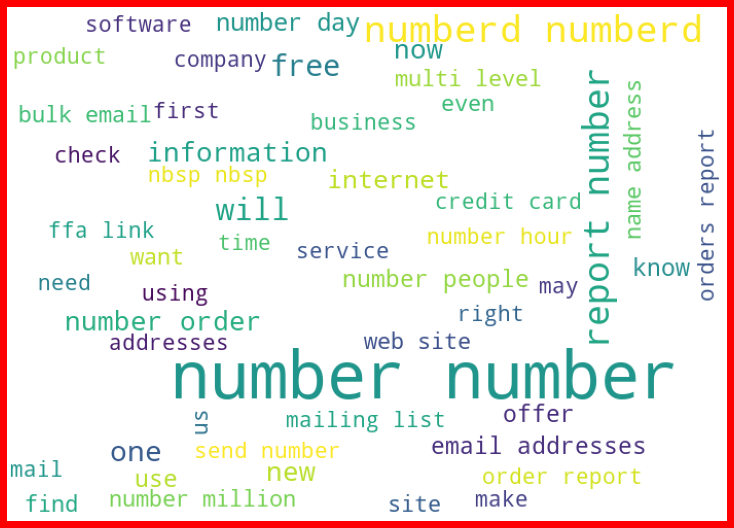

In [67]:
# Checking the Most frequent Words from the word-cloud
# Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df[df['label']==1]['message']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(str(v) for v in spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

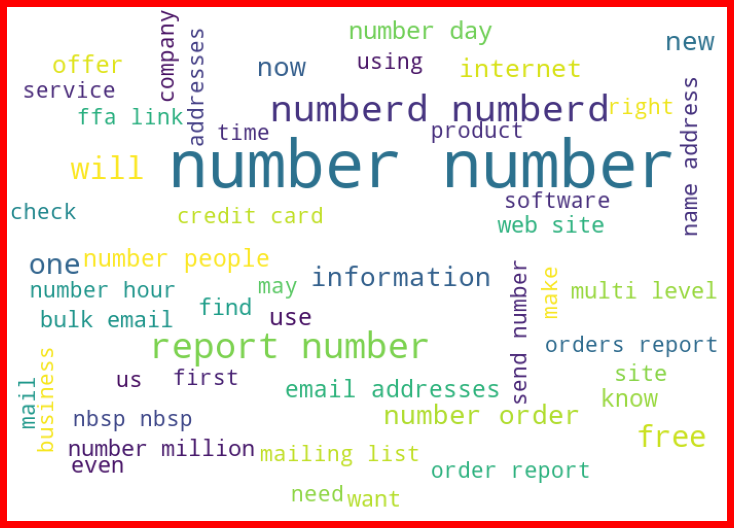

In [68]:
# Checking the most frequent words in the HAM messages
ham = df[df['label']==1]['message']
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(str(v) for v in ham))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [69]:
# Removing the stop words from the feature messages
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [70]:
# New_feature after clearning the stop_words
df['clear_length'] = df.message.str.len()
df.head(2)

,subject,message,label,length,clear_length
0,job posting apple iss research center,content length number apple iss research cente...,0,2856,2052
1,,lang classification grimes joseph e barbara f ...,0,1800,1451


In [71]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [72]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8497913769123783


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       599
           1       1.00      0.10      0.18       120

    accuracy                           0.85       719
   macro avg       0.92      0.55      0.55       719
weighted avg       0.87      0.85      0.79       719



In [74]:
# Applying the Naive Bayes for the classification after the resampling of the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.70)
X_train_ns , Y_train_ns = os.fit_sample(X_train , Y_train)
print("Number of classes before fit {}".format(Counter(Y_train)))
print("Number of classes after fit {}".format(Counter(Y_train_ns)))

Number of classes before fit Counter({0: 1809, 1: 348})
Number of classes after fit Counter({0: 1809, 1: 1266})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [75]:
naive.fit(X_train_ns,Y_train_ns)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9972183588317107


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       0.99      0.99      0.99       120

    accuracy                           1.00       719
   macro avg       0.99      0.99      0.99       719
weighted avg       1.00      1.00      1.00       719

